In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

data=pd.read_csv("/content/drive/My Drive/mart.csv")

In [0]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [0]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
data.describe(include=["object","boolean"])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [0]:
for cat in data.select_dtypes(include="object"):
  print(data[cat].value_counts())

FDG33    10
FDW13    10
FDD38     9
FDP25     9
NCY18     9
         ..
FDY43     1
FDQ60     1
FDE52     1
FDT35     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    279

In [0]:
#data.drop('Item_Identifier',axis=1,inplace=True)

In [0]:
data.shape

(8523, 11)

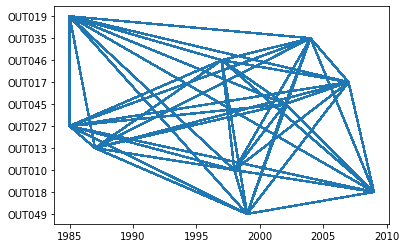

In [0]:
#Outlet_Identifier	Outlet_Establishment_Year	Outlet_Size	Outlet_Location_Type	Outlet_Type
plt.plot(data['Outlet_Establishment_Year'],data['Outlet_Identifier'])

plt.show()

In [0]:
pd.crosstab(data['Outlet_Size'],data['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


In [0]:
data.pivot_table(['Item_Type'],['Outlet_Size','Outlet_Identifier',	'Outlet_Establishment_Year',	'Outlet_Location_Type',	'Outlet_Type'],aggfunc='count')

Item_Type
Outlet_Size Outlet_Identifier Outlet_Establishment_Year Outlet_Location_Type Outlet_Type                 
High        OUT013            1987                      Tier 3               Supermarket Type1        932
Medium      OUT018            2009                      Tier 3               Supermarket Type2        928
            OUT027            1985                      Tier 3               Supermarket Type3        935
            OUT049            1999                      Tier 1               Supermarket Type1        930
Small       OUT019            1985                      Tier 1               Grocery Store            528
            OUT035            2004                      Tier 2               Supermarket Type1        930
            OUT046            1997                      Tier 1               Supermarket Type1        930

In [0]:

data['Outlet_Size'].isnull().sum()

2410

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


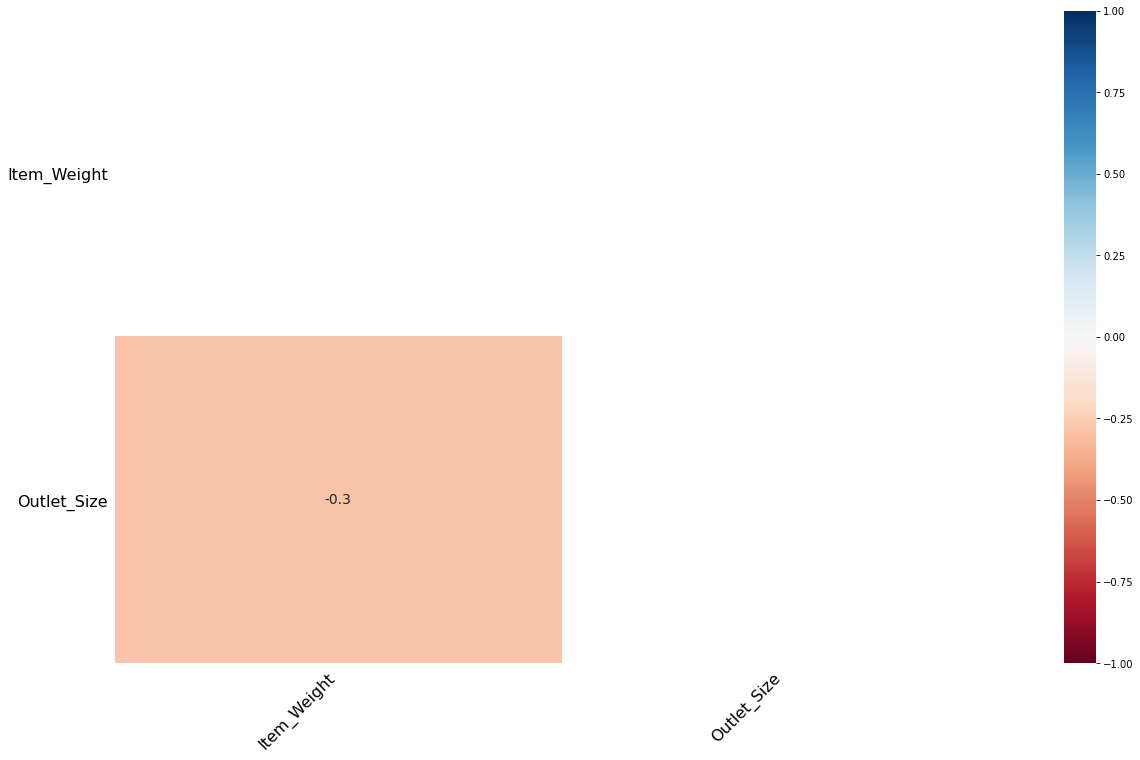

In [0]:
import seaborn as sn
import missingno as msno 
msno.heatmap(data)

In [0]:
data.sample(2).T

,2252,3373
Item_Weight,10.5,9.105
Item_Fat_Content,Regular,Low Fat
Item_Visibility,0.0225903,0.0386996
Item_Type,Snack Foods,Household
Item_MRP,140.615,33.79
Outlet_Identifier,OUT010,OUT017
Outlet_Establishment_Year,1998,2007
Outlet_Size,NaN,NaN
Outlet_Location_Type,Tier 3,Tier 2
Outlet_Type,Grocery Store,Supermarket Type1


In [0]:
#data['Item_Weight']= pd.to_numeric(data['Item_Weight'], errors='coerce')
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
# data['Item_Weight']=imputer.fit_transform(data[['Item_Weight']])
def fill_weight(row):
  return data.groupby("Item_Identifier").mean()["Item_Weight"][row["Item_Identifier"]]
print(data.isnull().sum())
data['Item_Weight'].fillna(data[data["Item_Weight"].isnull()].apply(fill_weight, axis=1),inplace=True)
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [0]:
data.dropna(axis=0, inplace=True)


In [0]:
data['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [0]:
from sklearn.impute import SimpleImputer
sm=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
data['Outlet_Size']=sm.fit_transform(data[['Outlet_Size']])


In [0]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler ,Normalizer
data['Item_Fat_Content']=LabelEncoder().fit_transform(data['Item_Fat_Content'])
data['Item_Type']=LabelEncoder().fit_transform(data['Item_Type'])
data['Outlet_Identifier']=LabelEncoder().fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']=LabelEncoder().fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=LabelEncoder().fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=LabelEncoder().fit_transform(data['Outlet_Type'])
data['Outlet_Establishment_Year']=LabelEncoder().fit_transform(data['Outlet_Establishment_Year'])

In [0]:
data.sample(6)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
930,13.350,1,0.032231,10,61.4194,9,4,1,0,1,743.0328
4709,6.195,1,0.072132,13,120.1098,7,5,1,1,1,2892.2352
1216,12.350,1,0.163911,9,119.2124,6,6,2,1,1,1303.6364
7720,12.850,1,0.168313,5,45.9060,1,1,0,2,1,885.5140
5678,10.695,2,0.087272,13,153.7972,2,7,1,1,1,2025.3636
3368,9.035,2,0.174176,10,148.9708,3,8,1,2,2,2257.0620


In [0]:
'''n=Normalizer().fit(x)
x=n.transform(x)
print(n)

st=StandardScaler()
data=st.fit_transform(data)
'''
#data=pd.DataFrame(data)


'n=Normalizer().fit(x)\nx=n.transform(x)\nprint(n)\n\nst=StandardScaler()\ndata=st.fit_transform(data)\n'

In [0]:
data[data['Item_Visibility']==0]=np.mean(data['Item_Visibility'])
print(data['Item_Visibility'].sample(3))

1159    0.247321
7143    0.081956
5865    0.097368
Name: Item_Visibility, dtype: float64


In [0]:

y=data['Item_Outlet_Sales']
x=data.drop('Item_Outlet_Sales',axis=1)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0)


In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
from sklearn.linear_model import LinearRegression ,Ridge
ln=LinearRegression()
ln.fit(x_train,y_train)
y_h=ln.predict(x_test)
print("linearRegression mse: {}".format(mean_squared_error(y_test, y_h)))
print("linearRegression rmse: {}".format(sqrt(mean_squared_error(y_test, y_h))))

linearRegression mse: 1348304.0318949553
linearRegression rmse: 1161.1649460326278


In [0]:
pr=Ridge(alpha=.5)
pr.fit(x_train,y_train)
y_h2=pr.predict(x_test)
print("Ridge mse: {}".format(mean_squared_error(y_test, y_h2)))
print("Ridge rmse: {}".format(sqrt(mean_squared_error(y_test, y_h2))))

Ridge mse: 1348371.0084710887
Ridge rmse: 1161.1937859251093


In [0]:
from sklearn.svm  import  SVR
sv=SVR(kernel='linear')
sv.fit(x_train,y_train)
y_p=sv.predict(x_test)
print("SVM mse: {}".format(mean_squared_error(y_test, y_p)))
print("svm rmse: {}".format(sqrt(mean_squared_error(y_test, y_p))))

SVM mse: 1467536.8885187118
svm rmse: 1211.4193693839932


In [0]:
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(n_estimators=10, random_state=0)
clf.fit(x_train, y_train)
y_p2=clf.predict(x_test)
print("Adaboost mse: {}".format(mean_squared_error(y_test, y_p2)))
print("Adaboost rmse: {}".format(sqrt(mean_squared_error(y_test, y_p2))))

Adaboost mse: 1177912.9874836693
Adaboost rmse: 1085.3169986154594
